My goal is to see if US treasury Bonds, GDP and Stock Market Volatility have predictive power on stock market returns. 

I am able to pull the data I need I am just not able to merge all of the data into the same dataframe. Below resides daily pricing data for the SP500, US treasury Bonds, the quarterly % change in US GDP, and the VIX volatility index along with associated EDA for each dataset.

In [4]:
from iexfinance import get_historical_data
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split

In [18]:
#Using the free IEX stock returns data, Pull daily returns of the S&P500 (using the ETF spy as a proxy)

ticker = 'SPY'
start_date='2015-01-01'
end_date='2018-10-26'
## start_date = pd.to_datetime(start_date)
## end_date = pd.to_datetime(end_date)
 
px_data = (get_historical_data(ticker, start=start_date, end=end_date, output_format='pandas'))
px_data = pd.DataFrame(px_data)


In [16]:
px_data.head()

AttributeError: 'dict' object has no attribute 'head'

In [77]:
px_data.dtypes

open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [78]:
px_data.shape

(711, 5)

In [80]:
px_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 2016-01-04 to 2018-10-26
Data columns (total 5 columns):
open      711 non-null float64
high      711 non-null float64
low       711 non-null float64
close     711 non-null float64
volume    711 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.3+ KB


In [86]:
px_data.describe()

,open,high,low,close,volume
count,711.000000,711.000000,711.000000,711.000000,7.110000e+02
mean,235.522852,236.444162,234.499676,235.548393,8.855829e+07
std,31.701673,31.770776,31.560709,31.611652,4.343941e+07
min,172.851600,174.520000,171.600200,173.344500,2.785651e+07
25%,207.604500,208.055850,206.647000,207.590100,6.013564e+07
50%,235.323700,236.529900,234.817900,235.119400,7.686966e+07
75%,264.703550,265.534050,263.239950,264.219100,1.025732e+08
max,293.090000,293.220000,291.810000,292.257400,3.550268e+08


In [37]:
px_data.isnull().sum()

## There is no missing data within the data set

open      0
high      0
low       0
close     0
volume    0
dtype: int64

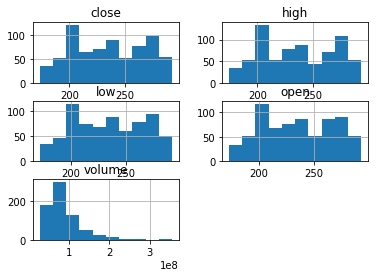

In [83]:
axes = px_data.hist();

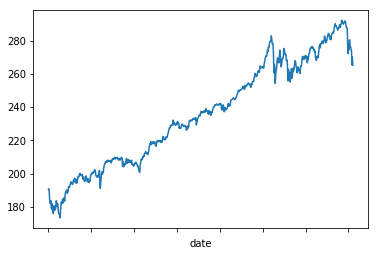

In [53]:
px_data.close.plot()

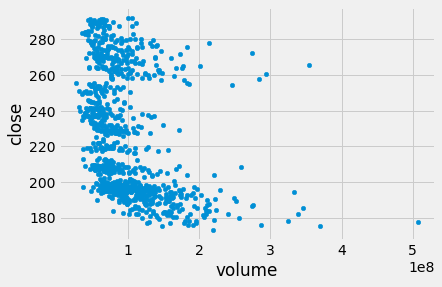

In [59]:
px_data.plot(kind='scatter', x='volume', y='close');

In [20]:
## Get 7-10 year treasury data 

ticker = 'IEF'
start_date='2015-01-01'
end_date='2018-10-26'
## start_date = pd.to_datetime(start_date)
## end_date = pd.to_datetime(end_date)
 
bd_data = (get_historical_data(ticker, start=start_date, end=end_date, output_format='pandas'))
bd_data = pd.DataFrame(bd_data)

In [21]:
bd_data.describe()

,open,high,low,close,volume
count,963.000000,963.000000,963.000000,963.000000,9.630000e+02
mean,102.600035,102.770239,102.438308,102.602467,2.267962e+06
std,2.395224,2.384589,2.399416,2.393613,1.478786e+06
min,97.698600,97.755000,97.445100,97.482600,4.903680e+05
25%,100.751700,100.890950,100.596500,100.711400,1.331534e+06
50%,101.919500,102.096200,101.721500,101.953700,1.852967e+06
75%,104.287250,104.432300,104.184850,104.299100,2.754434e+06
max,109.006600,109.091600,108.748000,108.987400,1.214504e+07


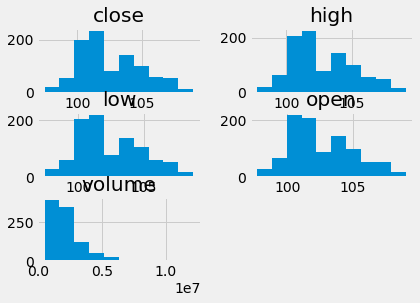

In [22]:
axes = bd_data.hist();

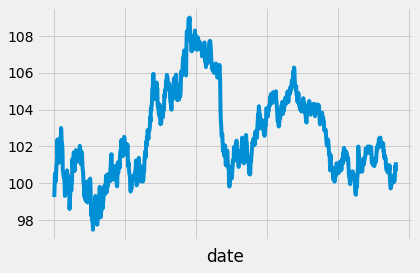

In [23]:
bd_data.close.plot()

In [61]:
bd_data.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [30]:
# Pull economic data from the St Louis Fed
# A191RP1Q027SBEA = Quarterly US GDP, Percent Change from Preceding Period, Seasonally Adjusted Annual Rate
import pandas as pd
from fredapi import Fred
fred = Fred(api_key='4c7572b1d37a258978891dc96280985b')
gdp_pctchange = pd.DataFrame(fred.get_series('A191RP1Q027SBEA'))

                             
##gdp_pctchange = pd.DataFrame(df)
##gdp_pctchange.columns=['date','pct % gdp']

In [32]:
gdp_pctchange.head()

,0
1947-04-01,4.7
1947-07-01,6.0
1947-10-01,17.3
1948-01-01,9.6
1948-04-01,10.7


In [33]:
gdp_pctchange.describe()

,0
count,286.000000
mean,6.509790
std,4.687951
min,-7.400000
25%,4.125000
50%,5.950000
75%,8.700000
max,26.800000


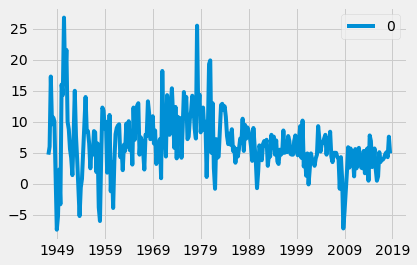

In [35]:
gdp_pctchange.plot()

In [62]:
gdp_pctchange.isnull().sum()

0    0
dtype: int64

In [121]:
# Merge with stock returns tHIS IS WHERE I AM UNABLE TO COMBINE ALL OF THE DATA INTO ONE DATAFRAME
combo_df = pd.merge(px_data, GDP_pctchange)

ValueError: can not merge DataFrame with instance of type <class 'pandas.core.series.Series'>

In [43]:
import quandl

df = quandl.get("CHRIS/CBOE_VX1",start_date="2015-01-01", end_date="2018-10-26", authtoken="GNBMgJdzyiQFueqM6pzC")
vix_data = pd.DataFrame(df)

In [44]:
vix_data.tail()

,Open,High,Low,Close,Settle,Change,Total Volume,EFP,Prev. Day Open Interest
Trade Date,,,,,,,,,
2018-10-22,18.75,19.36,18.05,18.62,18.625,0.20,146937.0,3012.0,208553.0
2018-10-23,18.65,20.83,18.60,18.90,18.825,0.20,252351.0,2545.0,213167.0
2018-10-24,18.90,21.35,18.75,20.37,20.625,1.80,242752.0,1424.0,213758.0
2018-10-25,20.50,21.35,19.96,21.06,20.925,0.30,199238.0,2131.0,205847.0
2018-10-26,21.10,22.65,20.86,21.30,21.075,0.15,283965.0,2405.0,199508.0


In [45]:
vix_data.head()

,Open,High,Low,Close,Settle,Change,Total Volume,EFP,Prev. Day Open Interest
Trade Date,,,,,,,,,
2015-01-02,17.85,18.90,17.07,17.85,17.825,-0.20,111324.0,0.0,111105.0
2015-01-05,17.85,19.55,17.55,19.11,19.125,1.30,115804.0,0.0,104245.0
2015-01-06,19.05,20.55,18.70,19.85,19.875,0.75,139001.0,0.0,97339.0
2015-01-07,19.80,19.80,18.64,18.83,18.850,-1.02,97060.0,0.0,94806.0
2015-01-08,18.90,18.90,17.50,17.70,17.675,-1.18,86495.0,0.0,89742.0


In [46]:
vix_data.describe()

,Open,High,Low,Close,Settle,Change,Total Volume,EFP,Prev. Day Open Interest
count,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000
mean,15.489572,16.205475,15.014838,15.449467,15.512576,-0.024462,115029.009404,310.043887,160966.272727
std,3.619912,3.891636,3.166866,3.678383,3.546095,1.203750,58211.414118,1094.243030,77457.011749
min,0.000000,10.000000,9.600000,0.000000,9.875000,-9.350000,0.000000,0.000000,0.000000
25%,13.000000,13.450000,12.700000,12.930000,12.925000,-0.450000,83033.000000,0.000000,102999.000000
50%,14.850000,15.400000,14.480000,14.800000,14.825000,-0.100000,102409.000000,0.000000,155159.000000
75%,17.250000,18.050000,16.510000,17.130000,17.225000,0.250000,130431.000000,140.000000,216141.000000
max,31.750000,33.350000,26.490000,33.200000,33.225000,17.600000,567407.000000,17669.000000,376684.000000


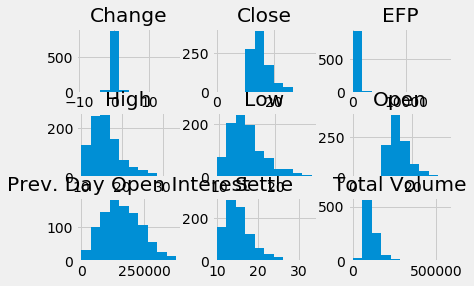

In [50]:
axes = vix_data.hist();

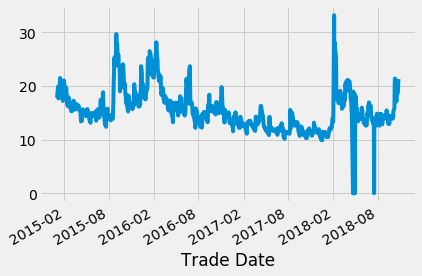

In [54]:
axe = vix_data.loc[:,'Close'].plot()

In [63]:
vix_data.isnull().sum()

Open                       0
High                       0
Low                        0
Close                      0
Settle                     0
Change                     0
Total Volume               0
EFP                        0
Prev. Day Open Interest    0
dtype: int64

Please ignore the below this is advance work for the next project deliverable

In [57]:
forecast_out = int(30) # predicting 30 days into future
px_data['Prediction'] = px_data[['close']].shift(-forecast_out) #  label column with data shifted 30 units up

In [58]:
X = np.array(px_data.drop(['Prediction'], 1))
X = preprocessing.scale(X)

In [59]:
X_forecast = X[-forecast_out:] # set X_forecast equal to last 30
X = X[:-forecast_out] # remove last 30 from X

In [60]:
y = np.array(px_data['Prediction'])
y = y[:-forecast_out]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [62]:
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.957160693133158


In [63]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[290.70557726 291.05990641 291.77624617 294.43345729 294.54512552
 293.27723306 292.98394456 291.96374381 292.31108186 292.43346377
 293.7787419  293.37781163 293.96934141 292.71874236 290.90868785
 290.19584466 289.32142598 283.69756907 277.04082501 280.35300948
 277.12077766 281.90599644 283.75585416 280.28501649 278.94441947
 278.36148671 276.09333439 270.86295964 272.15279077 268.17923768]


In [64]:
px_data.head()

,open,high,low,close,volume,Prediction
date,,,,,,
2016-01-04,190.0571,190.5690,188.2560,190.5588,222353534,182.8431
2016-01-05,190.9197,191.3937,189.6400,190.8818,110845849,182.0942
2016-01-06,188.0190,189.6495,187.3175,188.4740,152112604,182.0089
2016-01-07,185.1656,187.1658,183.5161,183.9522,213436073,184.6442
2016-01-08,185.0329,185.6585,181.6107,181.9359,209817228,182.3122


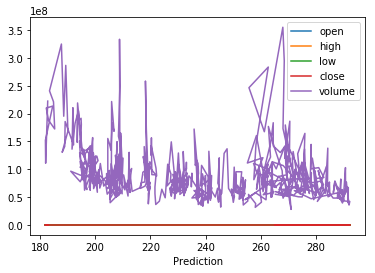

In [65]:
px_data.plot('Prediction');